# Disease Prognosis using Predictive Modelling


In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv") #reading data storing it in dataframe

In [3]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape #showing number of instances (rows) and number of features including target variable (columns), respectively


(569, 33)

In [5]:
df.columns #names of columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#checking for missing values
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df=df.drop(columns=['id','Unnamed: 32']) #removing 'id' and 'Unnamed: 32' columns because they are not useful for analysis purpose

In [8]:
#frequency of benign(B) and malignant(M)
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

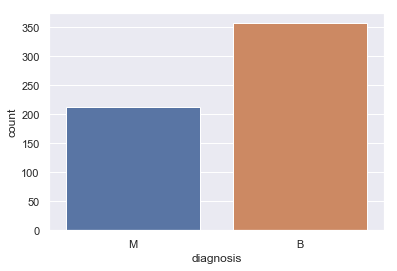

In [9]:
#Frequency plot
sns.set(style="darkgrid")
sns.countplot(df['diagnosis'], label="Frequency")

In [10]:
#feature mapping for 'diagnosis'(target variable)
#M as 1 and B as 0
binary_map = {'diagnosis':{'M':1,'B':0}}
df.replace(binary_map, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X=df.drop(columns=['diagnosis']) #features(without target variable)
y=df['diagnosis'] #target variable


In [12]:
 #Min max scaling of all features
df_scaled=(df-df.min())/(df.max()-df.min())
print ("\nAfter Min-Max Scaling : \n", df_scaled) 



After Min-Max Scaling : 
      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0     0.521037      0.022658        0.545989   0.363733   
1          1.0     0.643144      0.272574        0.615783   0.501591   
2          1.0     0.601496      0.390260        0.595743   0.449417   
3          1.0     0.210090      0.360839        0.233501   0.102906   
4          1.0     0.629893      0.156578        0.630986   0.489290   
5          1.0     0.258839      0.202570        0.267984   0.141506   
6          1.0     0.533343      0.347311        0.523875   0.380276   
7          1.0     0.318472      0.376057        0.320710   0.184263   
8          1.0     0.284869      0.409537        0.302052   0.159618   
9          1.0     0.259312      0.484613        0.277659   0.140997   
10         1.0     0.427801      0.457558        0.407090   0.277540   
11         1.0     0.416442      0.276632        0.413309   0.270414   
12         1.0     0.576885      0.51

In [13]:
#Min max scaling of all features
X_scaled=(X-X.min())/(X.max()-X.min())
print ("\nAfter Min-Max Scaling : \n", X_scaled) 


After Min-Max Scaling : 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
5       0.258839      0.202570        0.267984   0.141506         0.678613   
6       0.533343      0.347311        0.523875   0.380276         0.379164   
7       0.318472      0.376057        0.320710   0.184263         0.598267   
8       0.284869      0.409537        0.302052   0.159618         0.674099   
9       0.259312      0.484613        0.277659   0.140997         0.595558   
10      0.427801      0.457558        0.407090   0.277540         0.265686   
11      0.416442      0.276632       

### Splitting data into train and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30, random_state=5) #splitting into train and test dataset
X_train_scaled=(X_train1-X_train1.min())/(X_train1.max()-X_train1.min())

## Logistic Regression

In [15]:
#Using Logistic Regression Model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

logreg1= LogisticRegression()

logreg1.fit(X_train1,y_train1)

pred=logreg1.predict(X_test1)

parameters = logreg1.coef_

print(parameters) #parameters of the model

[[-1.81448450e+00 -1.51040364e-01  1.21728232e-01 -8.47326563e-04
   1.06329836e-01  3.13724720e-01  5.16198254e-01  2.63049220e-01
   1.43409214e-01  1.29107208e-02 -5.79132508e-02 -1.57907498e+00
  -2.15489592e-01  1.01066674e-01  1.18204342e-02  5.16385547e-03
   6.27442496e-02  3.10103910e-02  2.23904882e-02 -3.44652863e-03
  -1.68452729e+00  4.00684033e-01  1.11538566e-01  2.59632532e-02
   1.92525275e-01  8.43143864e-01  1.29073589e+00  4.81719556e-01
   4.52640416e-01  8.05701897e-02]]


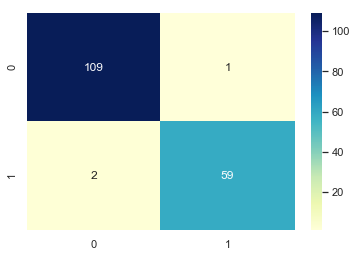

In [16]:
#Creating Confusion matrix for test data
cm1 = confusion_matrix(y_test1, pred)

sns.heatmap(cm1,annot=True,fmt="d",cmap="YlGnBu")

In [17]:
print(classification_report(y_test1,pred)) #for test data

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.98      0.97      0.98        61

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Support Vector Machine

### SVM - Linear

In [18]:
from sklearn.svm import SVC 


In [19]:
#taking parameter C as 0.01
svc0 = SVC(C=0.01, kernel='linear')
svc0.fit(X_train1, y_train1)
pred_0=svc0.predict(X_test1)
pred_0 #predictions of test data

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

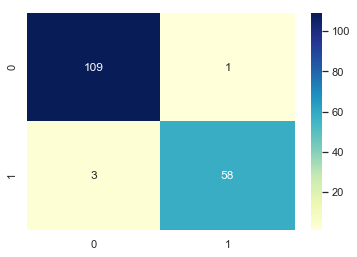

In [20]:
#Creating Confusion matrix for test data
cm_0 = confusion_matrix(y_test1, pred_0)

sns.heatmap(cm_0,annot=True,fmt="d",cmap="YlGnBu")

In [21]:
print(classification_report(y_test1,pred_0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.98      0.95      0.97        61

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [22]:
#taking parameter C as 0.1
svcmodel0 = SVC(C=0.1, kernel='linear')
svcmodel0.fit(X_train1, y_train1)
pred_svc0=svcmodel0.predict(X_test1)
pred_svc0

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

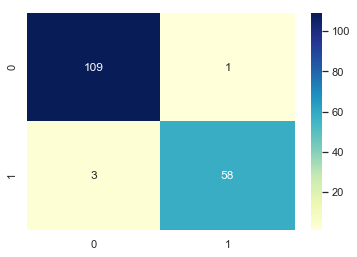

In [23]:
#Creating Confusion matrix
cm0 = confusion_matrix(y_test1, pred_svc0)

sns.heatmap(cm0,annot=True,fmt="d",cmap="YlGnBu")

In [24]:
print(classification_report(y_test1,pred_svc0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.98      0.95      0.97        61

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [25]:
#taking C parameter as 1
svcmodel = SVC(C=1, kernel='linear')
svcmodel.fit(X_train1, y_train1)
svcmodel.fit(X_train1,y_train1)
pred_svc=svcmodel.predict(X_test1)
pred_svc


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

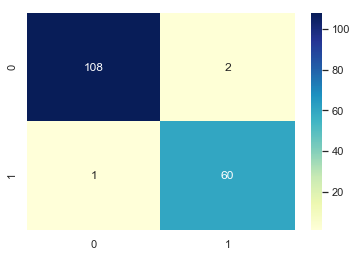

In [26]:
#Creating Confusion matrix
cm2 = confusion_matrix(y_test1, pred_svc)

sns.heatmap(cm2,annot=True,fmt="d",cmap="YlGnBu")

In [27]:
print(classification_report(y_test1,pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.97      0.98      0.98        61

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### SVM - RBF kernel

In [28]:
from sklearn.model_selection import GridSearchCV  #grid search cross validation for parameter tuning
t_parameters = [{'C': [0.01, 0.1, 1, 10],
                     'gamma': [0.5, 1,2]}]
model=GridSearchCV(SVC(kernel='rbf'), t_parameters, cv=10, scoring='accuracy')
model.fit(X_train1, y_train1)
model.best_params_

{'C': 0.01, 'gamma': 0.5}

In [29]:
rbfmodel = SVC(C=0.01, kernel='rbf', gamma=0.5)
rbfmodel.fit(X_train1, y_train1)
pred_rbf=rbfmodel.predict(X_test1)
pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

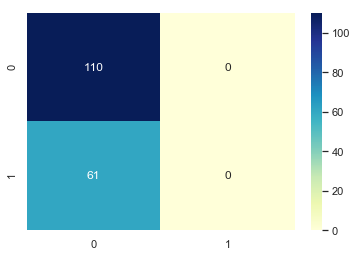

In [30]:
#Creating Confusion matrix
cm_rbf = confusion_matrix(y_test1, pred_rbf)
sns.heatmap(cm_rbf,annot=True,fmt="d",cmap="YlGnBu")

In [31]:
print(classification_report(y_test1,pred_rbf))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       110
           1       0.00      0.00      0.00        61

   micro avg       0.64      0.64      0.64       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.41      0.64      0.50       171



Results are sub-optimal so max-min normalization is done

In [32]:
X_train_scaled=(X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_test_scaled=(X_test1-X_test1.min())/(X_test1.max()-X_test1.min())


In [33]:
#using normalized data
from sklearn.model_selection import GridSearchCV  #grid search cross validation for parameter tuning
t_parameters = [{'C': [0.01, 0.1, 1, 10],
                     'gamma': [0.5, 1,2]}]
model2 = GridSearchCV(SVC(kernel='rbf'), t_parameters, cv=10, scoring='accuracy')
model2.fit(X_train_scaled, y_train1)
model2.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 1}

In [34]:
rbfmodel2 = SVC(C=1, kernel='rbf', gamma=2)
rbfmodel2.fit(X_train_scaled, y_train1)
pred_rbf2=rbfmodel2.predict(X_test_scaled)
pred_rbf2

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

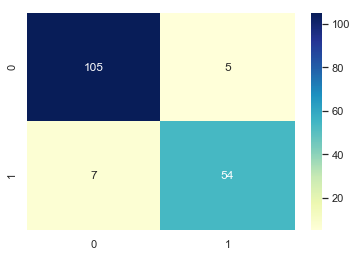

In [35]:
#Creating Confusion matrix
cm_rbf2 = confusion_matrix(y_test1, pred_rbf2)
sns.heatmap(cm_rbf2,annot=True,fmt="d",cmap="YlGnBu")

In [36]:
print(classification_report(y_test1,pred_rbf2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       110
           1       0.92      0.89      0.90        61

   micro avg       0.93      0.93      0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### Decision Tree Classifier

In [37]:
from sklearn import tree
tmodel=tree.DecisionTreeClassifier()
tmodel.fit(X_train1,y_train1)
pred_tree=tmodel.predict(X_test1)

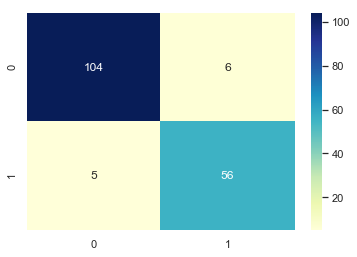

In [38]:
#Creating Confusion matrix
cmtree = confusion_matrix(y_test1, pred_tree)
sns.heatmap(cmtree,annot=True,fmt="d",cmap="YlGnBu")

In [39]:
print(classification_report(y_test1,pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.90      0.92      0.91        61

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### ROC and AUC

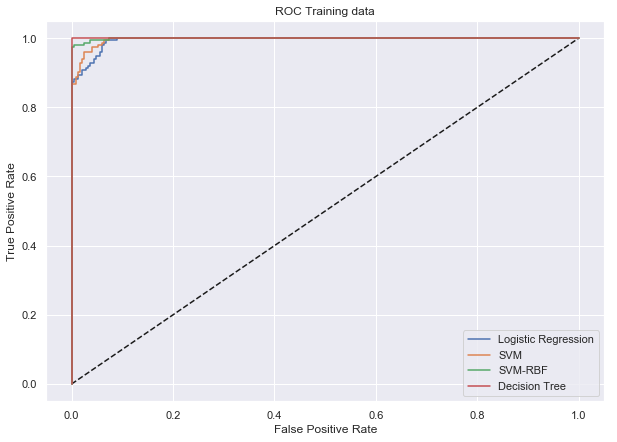

In [41]:
#training data ROC for various models
from sklearn.metrics import roc_curve
ypred_train1=logreg1.predict_proba(X_train1)[:,1]
ypred_train2=svcmodel.decision_function(X_train1)
ypred_train3=rbfmodel2.decision_function(X_train_scaled)
ypred_train4=tmodel.predict_proba(X_train1)[:,1]

fpr, tpr, thresholds=roc_curve(y_train1, ypred_train1)
fpr2, tpr2, thresholds2=roc_curve(y_train1, ypred_train2)
fpr3, tpr3, thresholds3=roc_curve(y_train1, ypred_train3)
fpr4, tpr4, thresholds4=roc_curve(y_train1, ypred_train4)
fig1= plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(fpr2,tpr2, label='SVM')
plt.plot(fpr3,tpr3, label='SVM-RBF')
plt.plot(fpr4,tpr4, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training data')
plt.legend()
plt.show()

In [48]:
#AUC for training data
from sklearn.metrics import auc

fpr_train_1, tpr_train_1, _ = roc_curve(y_train1, ypred_train1)
fpr_train_2, tpr_train_2, _ = roc_curve(y_train1, ypred_train2)
fpr_train_3, tpr_train_3, _ = roc_curve(y_train1, ypred_train3)
fpr_train_4, tpr_train_4, _ = roc_curve(y_train1, ypred_train4)

auc1 = auc(fpr_train_1, tpr_train_1)
auc2 = auc(fpr_train_2, tpr_train_2)
auc3 = auc(fpr_train_3, tpr_train_3)
auc4 = auc(fpr_train_4, tpr_train_4)
print("AUC for training data")
print("Logistic Regression: "+str(auc1))
print("SVM-Linear: "+str(auc2))
print("SVM-RBF: "+str(auc3))
print("Decision Tree: "+str(auc4))


AUC for training data
Logistic Regression: 0.9945572029921979
SVM-Linear: 0.9962999705070112
SVM-RBF: 0.9990883985307129
Decision Tree: 1.0


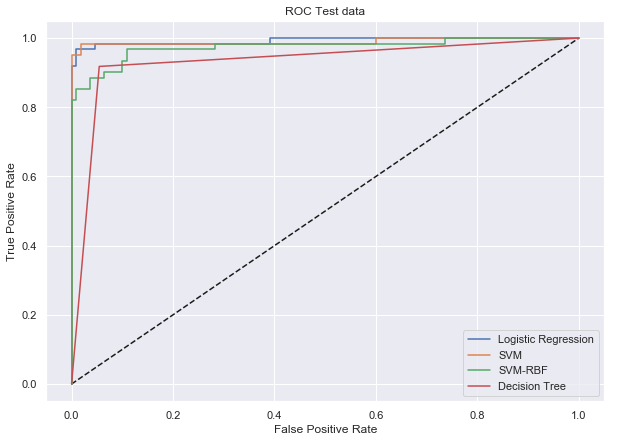

In [43]:
#ROC for test data
from sklearn.metrics import roc_curve
ypred_prob1=logreg1.predict_proba(X_test1)[:,1]
ypred_prob2=svcmodel.decision_function(X_test1)
ypred_prob3=rbfmodel2.decision_function(X_test_scaled)
ypred_prob4=tmodel.predict_proba(X_test1)[:,1]

fpr, tpr, thresholds=roc_curve(y_test1, ypred_prob1)
fpr2, tpr2, thresholds2=roc_curve(y_test1, ypred_prob2)
fpr3, tpr3, thresholds3=roc_curve(y_test1, ypred_prob3)
fpr4, tpr4, thresholds4=roc_curve(y_test1, ypred_prob4)
fig= plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr2,tpr2,label='SVM')
plt.plot(fpr3,tpr3,label='SVM-RBF')
plt.plot(fpr4,tpr4,label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test data')
plt.legend()
plt.show()

In [47]:
#AUC for test data
from sklearn.metrics import auc
fpr_test_1, tpr_test_1, _ = roc_curve(y_test1, ypred_prob1)
fpr_test_2, tpr_test_2, _ = roc_curve(y_test1, ypred_prob2)
fpr_test_3, tpr_test_3, _ = roc_curve(y_test1, ypred_prob3)
fpr_test_4, tpr_test_4, _ = roc_curve(y_test1, ypred_prob4)

testauc1 = auc(fpr_test_1, tpr_test_1)
testauc2 = auc(fpr_test_2, tpr_test_2)
testauc3 = auc(fpr_test_3, tpr_test_3)
testauc4 = auc(fpr_test_4, tpr_test_4)
print("AUC for test data")
print("Logistic Regression: "+str(testauc1))
print("SVM-linear: "+str(testauc2))
print("SVM-RBF: "+str(testauc3))
print("Decision tree: "+str(testauc4))

AUC for test data
Logistic Regression: 0.9923994038748138
SVM-linear: 0.9895678092399404
SVM-RBF: 0.973919523099851
Decision tree: 0.9317436661698958


### Hence, according to AUC for test data, Logistic regression model shows the best results.